<a href="https://colab.research.google.com/github/oneryigit/for_my_reference/blob/main/Interaction_Effect_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interaction Effect Plot

- Matt Golder and his coauthors suggest a spesific way to show the interaction effect. They have suberb tutorials (see: http://mattgolder.com/interactions) about how to use interaction terms in the models properly. 

- In this notebook, I replicate Golder et al.'s STATA code using Python. To my knowladge, no one has created interaction plot using Python. (There is a package for R users (see: https://cran.r-project.org/web/packages/interplot/vignettes/interplot-vignette.html), which is also a great tool to use. However, we still do not have such function to implement interaction plot in Python. I hope someone with better knowladge of Python can write some forms of functions or package for interaction plot.)

- Enough talking. Let's create interaction plot using Python. 


In [233]:
#Import some packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [396]:
#load the dataset. source: http://mattgolder.com/interactions 

df= pd.read_stata('/content/drive/MyDrive/interaction1/alexseev.dta')
df=df.dropna()
df.head()

,region,xenovote,slavicshare,changenonslav,slavicshare_changenonslav,inc9903,eduhi02,unemp02,apt9200,vsall03,brdcont
0,1.0,14.0,90.643288,-0.876622,-79.459938,1992.785522,121.59819,0.889216,70.093658,3.602349,1.0
1,2.0,18.5,95.282722,-1.096682,-104.494865,2558.000000,131.00000,0.996678,54.000000,5.133074,1.0
2,3.0,13.0,96.808777,-0.286360,-27.722204,3465.000000,118.00000,1.197605,31.000000,5.735354,0.0
3,4.0,13.5,74.261459,3.035891,225.449692,2655.000000,134.00000,0.796020,54.000000,4.796563,1.0
4,5.0,11.0,41.599594,3.512825,146.132095,2908.000000,115.00000,0.584795,34.000000,2.784185,0.0


## $Y= β + β_1X + β_2Z + β_3XZ+ ϵ$

In [238]:
#Run the OLS model

model = smf.ols(formula=
                'xenovote ~ slavicshare + changenonslav + slavicshare_changenonslav + inc9903 + eduhi02 + unemp02 + apt9200 + vsall03 + brdcont',
                data=df).fit(cov_type='cluster', cov_kwds={'groups':df['region']}, use_t=True)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               xenovote   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     12.73
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           8.61e-12
Time:                        00:34:58   Log-Likelihood:                -152.31
No. Observations:                  72   AIC:                             324.6
Df Residuals:                      62   BIC:                             347.4
Df Model:                           9                                         
Covariance Type:              cluster                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [239]:
#elements of the estimated coefﬁcient vector
# scalar in STATA 
print(model.params) 

Intercept                    8.942878
slavicshare                  0.031486
changenonslav               -0.851108
slavicshare_changenonslav    0.008226
inc9903                      0.000234
eduhi02                     -0.039512
unemp02                      1.432013
apt9200                      0.030125
vsall03                      0.661163
brdcont                      2.103688
dtype: float64


In [240]:
#save coefs as b 
b= model.params

In [241]:
#Variance-Coveriance matrix

print(model.cov_params())

                           Intercept   slavicshare  ...   vsall03   brdcont
Intercept                  10.073281 -2.175941e-02  ... -0.685161 -0.322368
slavicshare                -0.021759  4.905047e-04  ... -0.001418  0.004298
changenonslav              -0.376554  4.305058e-03  ...  0.019171  0.055818
slavicshare_changenonslav   0.004221 -5.822067e-05  ... -0.000084 -0.000680
inc9903                     0.000126 -1.047080e-07  ... -0.000004 -0.000024
eduhi02                    -0.013565  2.107277e-05  ... -0.000635  0.000718
unemp02                    -0.725426 -1.457091e-04  ...  0.012112  0.058402
apt9200                    -0.053394 -3.868874e-04  ...  0.007354 -0.007781
vsall03                    -0.685161 -1.417979e-03  ...  0.109903  0.026928
brdcont                    -0.322368  4.298085e-03  ...  0.026928  0.425536

[10 rows x 10 columns]


In [242]:
#assign cov-var to V as we did above for b 
V= model.cov_params()

In [54]:
b[0] # is the coeficent of constant

b[1] # is the coeficent of slavicshare (b1) X

b[2] # is the coeficent of changenonslav (b2) Z

B[3] # is the coeficent of slavicshare_changenonslav (b3) X*Z

-0.8511076068287307

In [263]:
#assign them to variables. We will use it later on.  
b1= b[1] #X
b2=b[2] #Z
b3= b[3] #XZ

In [65]:
V #here is the variance coverience matrix

,Intercept,slavicshare,changenonslav,slavicshare_changenonslav,inc9903,eduhi02,unemp02,apt9200,vsall03,brdcont
Intercept,10.073281,-2.175941e-02,-0.376554,4.220535e-03,1.262667e-04,-1.356542e-02,-0.725426,-5.339373e-02,-0.685161,-0.322368
slavicshare,-0.021759,4.905047e-04,0.004305,-5.822067e-05,-1.047080e-07,2.107277e-05,-0.000146,-3.868874e-04,-0.001418,0.004298
changenonslav,-0.376554,4.305058e-03,0.103679,-1.436367e-03,1.138296e-05,3.019767e-04,-0.061743,-2.664113e-03,0.019171,0.055818
slavicshare_changenonslav,0.004221,-5.822067e-05,-0.001436,2.182352e-05,-2.333663e-07,-9.777098e-06,0.001036,4.886091e-05,-0.000084,-0.000680
inc9903,0.000126,-1.047080e-07,0.000011,-2.333663e-07,3.683641e-08,-8.051491e-07,-0.000073,-3.464140e-07,-0.000004,-0.000024
eduhi02,-0.013565,2.107277e-05,0.000302,-9.777098e-06,-8.051491e-07,1.272856e-04,0.002774,-5.529624e-05,-0.000635,0.000718
unemp02,-0.725426,-1.457091e-04,-0.061743,1.036104e-03,-7.323742e-05,2.774196e-03,0.403706,3.153644e-03,0.012112,0.058402
apt9200,-0.053394,-3.868874e-04,-0.002664,4.886091e-05,-3.464140e-07,-5.529624e-05,0.003154,1.261055e-03,0.007354,-0.007781
vsall03,-0.685161,-1.417979e-03,0.019171,-8.391738e-05,-4.499005e-06,-6.347258e-04,0.012112,7.353573e-03,0.109903,0.026928
brdcont,-0.322368,4.298085e-03,0.055818,-6.800301e-04,-2.437262e-05,7.177621e-04,0.058402,-7.781210e-03,0.026928,0.425536


In [264]:
varb1=V.loc['slavicshare','slavicshare'] # this is the V[1,1] in STATA.
varb2=V.loc['changenonslav','changenonslav'] #V[2,2]
varb3=V.loc['slavicshare_changenonslav','slavicshare_changenonslav'] #V[3,3]


In [265]:
covb1b3=V.loc['slavicshare','slavicshare_changenonslav'] #covariate of b1 and b3 V[1,3]
covb2b3=V.loc['changenonslav', 'slavicshare_changenonslav'] ##covariate of b2 and b3 V[2,3]

In [267]:
#to see all values, I store them in a dictionary. All values are the same with Golder's STATA codes, which is good. 

data_dic= {'b1':b1, 'b2':b2, 'b3':b3, 
           'varb1':varb1, 'varb2':varb2, 'varb3':varb3,
           'covb1b3':covb1b3, 'covb2b3':covb2b3}
data_dic

{'b1': 0.03148617146154395,
 'b2': -0.8511076068287307,
 'b3': 0.008225912336638984,
 'covb1b3': -5.822066622300277e-05,
 'covb2b3': -0.0014363668414884396,
 'varb1': 0.0004905046628589031,
 'varb2': 0.10367908764195664,
 'varb3': 2.1823522703312377e-05}

### Now here is the fun part.

In [398]:
df['changenonslav'].describe().T

#we can see that min value for our Z variable is -1.93 and max is 12.98.
#Good to know this info because we will run a simulation across this range. 

count    72.000000
mean      1.875956
std       2.901342
min      -1.934565
25%       0.156817
50%       1.113418
75%       2.255072
max      12.986169
Name: changenonslav, dtype: float64

In [287]:
#After finding all the essential matrix and vector components
#We can run a simulation

MVZ=np.linspace(-1.93, 13, 1501)

#this line of code creates 1501 observation that first observation starts from -1.93 and ends at 13. 
#This numbers are not random. We choose based on our Z variable. 
#This part is in STATA generate (_n-200)/100 part. 

#Why 1501? Because we want to limit our simulation for our max value, which is 13.
#So at 1501 observation, we reach 13, and we do not consider the rest as they will be over our range. 

In [288]:
#marginal effect of X on Y , conbx, for the desired values of the modifying variable Z
conbx=b1+b3*MVZ
conbx

array([0.01561016, 0.01569204, 0.01577391, ..., 0.13825928, 0.13834116,
       0.13842303])

In [291]:
# The standard error for the marginal effect of X for an interactive model
consx=np.sqrt(varb1+varb3*MVZ**2+2*covb1b3*MVZ)

In [399]:
#to create two-tailed 95% conﬁdence intervals, upper lower values.
ax=1.96*consx
upperx=conbx+ax
lowerx=conbx-ax

## Great! We are ready to plot the interaction effect.

In [379]:
print(plt.style.available) #this is a reference for available themes. just for design. 

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


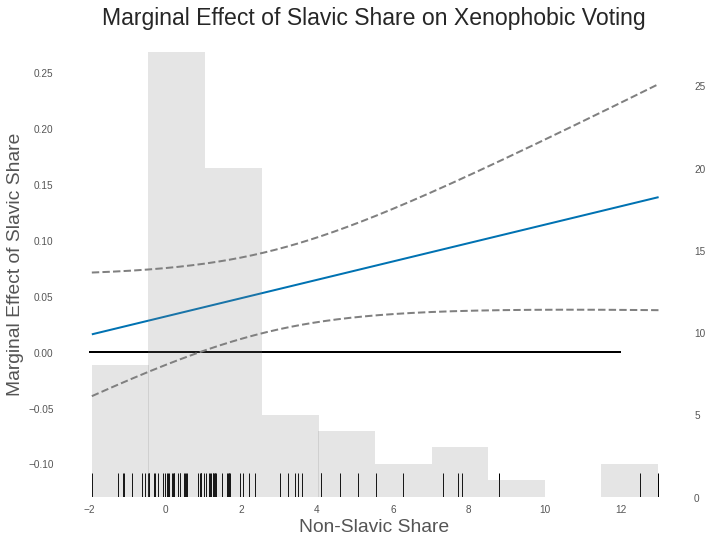

In [400]:
plt.rcParams.update({'font.size': 16}) #to set font size for all properties of plot
plt.style.use('seaborn-colorblind') #choose a theme from the list above. 

fig, axes= plt.subplots(figsize=(10,8)) # Initiate a figure and axes. 
axes.plot(MVZ, conbx) # plot our interaction effect line
axes.plot(MVZ, upperx, color='gray', linestyle='--') # plot upper confidence interval
axes.plot(MVZ, lowerx, color='gray',linestyle='--') # plot lower confidence interval
sns.rugplot(df['changenonslav'], height=0.05, color='k') #Golder suggests to have rug plot. Here it is. 
axes.hlines(0, -2, 12) # this is y=0 line 
axes.set_title('Marginal Effect of Slavic Share on Xenophobic Voting') #title 
axes.set_xlabel('Non-Slavic Share') #x axis 
axes.set_ylabel('Marginal Effect of Slavic Share') # y axis
axes1=axes.twinx() # to be able to show histogram on the same axes. we need to duplicate the axis. 
axes1.hist(df['changenonslav'], alpha=0.2, width=1.5, color='gray') #histogram
axes.set_facecolor('white') # some more design 
plt.grid(False) #no grid please
#fig.savefig('interactionplot.png')
plt.show()



# The end!

- We successfully replicated Golder's STATA codes using Python.